# "Intro to Collaborative Filtering" plus homework

## Authors: Dmitry Ignatov
Freely avaiable for non-commercial purposes. The code examples are based on T. Segaran [Programming Collective Intelligence book. Chapter 2](http://shop.oreilly.com/product/9780596529321.do)

The homework talsk is formulated in the last cells. Please send the results to TA (futurelife@gmail.com) and the lecturer (dmitrii.ignatov@gmail.com) with a *mandatory* topic [MMDA-HW2-RecSys]-Your-Full-Name.



### Deadlines: Soft – December 17, 22; Hard – December 19, 2022


## Dictionary with user preferences

In [1]:
# A dictionary of movie critics and their ratings of a small
# set of movies

critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [2]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [3]:
critics['Lisa Rose']['Lady in the Water']

2.5

In [4]:
#Euclid distance
from math import sqrt
sqrt(pow(5-4,2)+pow(4-1,2))


3.1622776601683795

In [5]:
#distance-based simialrity 
1/(1+sqrt(pow(5-4.5,2)+pow(5-5,2)))

0.6666666666666666

In [6]:
from numpy import exp

In [7]:
exp(-0.3*sqrt(pow(5-4.5,2)+pow(5-5,2))**2)


0.9277434863285529

In [8]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)


In [9]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_kernel(prefs,person1,person2,alpha=0.3):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences and take the wieghted exponent
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return exp(-alpha*sum_of_squares)

In [10]:
sim_kernel(critics, 'Lisa Rose','Toby')

0.3499377491111553

In [11]:
sim_distance(critics, 'Lisa Rose','Toby')

0.2222222222222222

In [12]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
 # Get the list of mutually rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: si[item]=1

     # if they are no ratings in common, return 0
    if len(si)==0: return 0

    # The number of mutually rated movies
    n=len(si)
  
    # Sums of all the preferences
    sum1=sum([prefs[p1][it] for it in si])
    sum2=sum([prefs[p2][it] for it in si])
    # Sums of the squares
    sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	
  
     # Sum of the products
    pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si]) #scalar product
  
     # Calculate r (Pearson score)
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0

    r=num/den

    return r

In [13]:
critics['Claudia Puig'], critics['Gene Seymour']

({'Snakes on a Plane': 3.5,
  'Just My Luck': 3.0,
  'The Night Listener': 4.5,
  'Superman Returns': 4.0,
  'You, Me and Dupree': 2.5},
 {'Lady in the Water': 3.0,
  'Snakes on a Plane': 3.5,
  'Just My Luck': 1.5,
  'Superman Returns': 5.0,
  'The Night Listener': 3.0,
  'You, Me and Dupree': 3.5})

In [14]:
sim_pearson(critics,'Claudia Puig','Gene Seymour'), sim_distance(critics, 'Lisa Rose','Gene Seymour')



(0.31497039417435607, 0.14814814814814814)

##  Ranking of critics

In [15]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.

def topMatches(prefs,person,n=5,similarity=sim_pearson):
    scores=[(similarity(prefs,person,other),other)
    for other in prefs if other!=person]
    # Descending sorting
    scores.sort( )
    scores.reverse( )
    return scores[0:n]


In [16]:
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [17]:
topMatches(critics,'Toby',n=3, similarity=sim_kernel)

[(0.5091564206075492, 'Mick LaSalle'),
 (0.4723665527410147, 'Michael Phillips'),
 (0.37719235356315695, 'Claudia Puig')]

In [18]:
topMatches(critics,'Toby',n=3, similarity=sim_distance)

[(0.3076923076923077, 'Mick LaSalle'),
 (0.2857142857142857, 'Michael Phillips'),
 (0.23529411764705882, 'Claudia Puig')]

## Movie recommendation (User-based approach)

In [19]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings

def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
     # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)
     # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
    # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
     # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
        # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
     # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    # Return the sorted list
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [20]:
getRecommendations(critics,'Toby')


[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [21]:
getRecommendations(critics,'Toby', sim_kernel)

[(3.5469111370529656, 'The Night Listener'),
 (2.729687080418633, 'Lady in the Water'),
 (2.518799545549861, 'Just My Luck')]

In [22]:
getRecommendations(critics,'Toby', sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

## Items similarity

How to replace 

{'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}}

by

{'Lady in the Water':{'Lisa Rose':2.5,'Gene Seymour':3.0},
'Snakes on a Plane':{'Lisa Rose':3.5,'Gene Seymour':3.5}}?


In [23]:
def transformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
    # Flip item and person
    
            result[item][person]=prefs[person][item]
    return result

In [24]:
movies=transformPrefs(critics)


In [25]:
movies

{'Lady in the Water': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.0,
  'Michael Phillips': 2.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0},
 'Snakes on a Plane': {'Lisa Rose': 3.5,
  'Gene Seymour': 3.5,
  'Michael Phillips': 3.0,
  'Claudia Puig': 3.5,
  'Mick LaSalle': 4.0,
  'Jack Matthews': 4.0,
  'Toby': 4.5},
 'Just My Luck': {'Lisa Rose': 3.0,
  'Gene Seymour': 1.5,
  'Claudia Puig': 3.0,
  'Mick LaSalle': 2.0},
 'Superman Returns': {'Lisa Rose': 3.5,
  'Gene Seymour': 5.0,
  'Michael Phillips': 3.5,
  'Claudia Puig': 4.0,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 5.0,
  'Toby': 4.0},
 'You, Me and Dupree': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.5,
  'Claudia Puig': 2.5,
  'Mick LaSalle': 2.0,
  'Jack Matthews': 3.5,
  'Toby': 1.0},
 'The Night Listener': {'Lisa Rose': 3.0,
  'Gene Seymour': 3.0,
  'Michael Phillips': 4.0,
  'Claudia Puig': 4.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0}}

In [26]:
topMatches(movies,'Snakes on a Plane',5, sim_pearson)

[(0.7637626158259785, 'Lady in the Water'),
 (0.11180339887498941, 'Superman Returns'),
 (-0.3333333333333333, 'Just My Luck'),
 (-0.5663521139548527, 'The Night Listener'),
 (-0.6454972243679047, 'You, Me and Dupree')]

In [27]:
topMatches(movies,'Snakes on a Plane',5, sim_distance)

[(0.2222222222222222, 'Lady in the Water'),
 (0.18181818181818182, 'The Night Listener'),
 (0.16666666666666666, 'Superman Returns'),
 (0.10526315789473684, 'Just My Luck'),
 (0.05128205128205128, 'You, Me and Dupree')]

In [28]:
getRecommendations(movies,'Lady in the Water', sim_distance)

[(3.352635310801229, 'Claudia Puig'), (2.4730878186968837, 'Toby')]

## Item-based collaborative filtering

In [29]:
def calculateSimilarItems(prefs,n=10):
    # Create a dictionary of items showing which other items they
  # are most similar to.
    result={}
    # Invert the preference matrix to be item-centric
    itemPrefs=transformPrefs(prefs)
    c=0
    for item in itemPrefs:
    # Status updates for large datasets
        c+=1
        if c%100==0: print("%d / %d" % (c,len(itemPrefs)))
    # Find the most similar items to this one
        scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
        result[item]=scores
    return result

In [30]:
itemsim=calculateSimilarItems(critics)
itemsim

{'Lady in the Water': [(0.4, 'You, Me and Dupree'),
  (0.2857142857142857, 'The Night Listener'),
  (0.2222222222222222, 'Snakes on a Plane'),
  (0.2222222222222222, 'Just My Luck'),
  (0.09090909090909091, 'Superman Returns')],
 'Snakes on a Plane': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'The Night Listener'),
  (0.16666666666666666, 'Superman Returns'),
  (0.10526315789473684, 'Just My Luck'),
  (0.05128205128205128, 'You, Me and Dupree')],
 'Just My Luck': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'You, Me and Dupree'),
  (0.15384615384615385, 'The Night Listener'),
  (0.10526315789473684, 'Snakes on a Plane'),
  (0.06451612903225806, 'Superman Returns')],
 'Superman Returns': [(0.16666666666666666, 'Snakes on a Plane'),
  (0.10256410256410256, 'The Night Listener'),
  (0.09090909090909091, 'Lady in the Water'),
  (0.06451612903225806, 'Just My Luck'),
  (0.05333333333333334, 'You, Me and Dupree')],
 'You, Me and Dupree': [(0.4,

In [31]:
def getRecommendedItems(prefs,itemMatch,user):
    userRatings=prefs[user]
    scores={}
    totalSim={}

    # Loop over items rated by this user
    for (item,rating) in userRatings.items():
        
    # Loop over items similar to this one
        for (similarity,item2) in itemMatch[item]:
    # Ignore if this user has already rated this item
            if item2 in userRatings: continue
         # Weighted sum of rating times similarity
            scores.setdefault(item2,0)
            scores[item2]+=similarity*rating
         # Sum of all the similarities
            totalSim.setdefault(item2,0)
            totalSim[item2]+=similarity
            if totalSim[item2]==0: totalSim[item2]=0.0000001 # to avoid divison by zero
    # Divide each total score by total weighting to get an average
    rankings=[(score/totalSim[item],item) for item,score in scores.items( ) ]

    # Return the rankings from highest to lowest
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [32]:
getRecommendedItems(critics,itemsim,'Toby')


[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

## Recommendations on MovieLens data 

Source: http://grouplens.org/datasets/movielens/

In [33]:
def loadMovieLens(path='data/'):
# Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
 # Load data
    prefs={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [34]:
prefs=loadMovieLens( )

In [35]:
prefs['87']

{'Naked Gun 33 1/3: The Final Insult (1994)': 4.0,
 'Con Air (1997)': 4.0,
 'Sabrina (1995)': 4.0,
 'Waterworld (1995)': 4.0,
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)': 3.0,
 'Clueless (1995)': 4.0,
 'Jurassic Park (1993)': 5.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Son in Law (1993)': 4.0,
 'Indiana Jones and the Last Crusade (1989)': 5.0,
 'Good, The Bad and The Ugly, The (1966)': 5.0,
 'Dead Poets Society (1989)': 5.0,
 'Dead Man Walking (1995)': 4.0,
 "Joe's Apartment (1996)": 2.0,
 'GoldenEye (1995)': 4.0,
 'M*A*S*H (1970)': 5.0,
 'Something to Talk About (1995)': 2.0,
 'Lightning Jack (1994)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Cowboy Way, The (1994)': 3.0,
 "Ulee's Gold (1997)": 3.0,
 'Addams Family Values (1993)': 2.0,
 '2001: A Space Odyssey (1968)': 5.0,
 'Platoon (1986)': 3.0,
 'Return of the Pink Panther, The (1974)': 4.0,
 'Four Weddings and a Funeral (1994)': 5.0,
 'Under Siege (1992)': 4.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Die Hard: Wit

In [36]:
len(prefs['87'])

210

In [37]:
getRecommendations(prefs,'87')[0:6]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)')]

In [38]:
itemsim=calculateSimilarItems(prefs,n=50)

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


In [39]:
itemsim['Star Kid (1997)']

[(1.0, 'Wonderland (1997)'),
 (1.0, 'Spice World (1997)'),
 (1.0, 'Sphere (1998)'),
 (1.0, 'Spawn (1997)'),
 (1.0, 'Shooting Fish (1997)'),
 (1.0, 'Shadow Conspiracy (1997)'),
 (1.0, 'Replacement Killers, The (1998)'),
 (1.0, 'Red Corner (1997)'),
 (1.0, 'Prophecy II, The (1998)'),
 (1.0, 'Playing God (1997)'),
 (1.0, 'Peacemaker, The (1997)'),
 (1.0, 'Murder at 1600 (1997)'),
 (1.0, 'Mortal Kombat: Annihilation (1997)'),
 (1.0, 'Magic Hour, The (1998)'),
 (1.0, 'Leading Man, The (1996)'),
 (1.0, 'Kull the Conqueror (1997)'),
 (1.0, 'Kicked in the Head (1997)'),
 (1.0, 'Jackal, The (1997)'),
 (1.0, 'Hugo Pool (1997)'),
 (1.0, 'How to Be a Player (1997)'),
 (1.0, 'Half Baked (1998)'),
 (1.0, 'Good Will Hunting (1997)'),
 (1.0, 'Four Days in September (1997)'),
 (1.0, 'Fire Down Below (1997)'),
 (1.0, 'Fast, Cheap & Out of Control (1997)'),
 (1.0, 'Fallen (1998)'),
 (1.0, 'Edge, The (1997)'),
 (1.0, 'Duoluo tianshi (1995)'),
 (1.0, 'Desperate Measures (1998)'),
 (1.0, "Dante's Peak (1997

In [40]:
getRecommendedItems(prefs,itemsim,'87')[0:30]

[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Scream (1996)'),
 (5.0, 'Rumble in the Bronx (1995)'),
 (5.0, 'Rock, The (1996)'),
 (5.0, 'Robin Hood: Prince of Thieves (1991)'),
 (5.0, 'Reservoir Dogs (1992)'),
 (5.0, 'Police Story 4: Project S (Chao ji ji hua) (1993)'),
 (5.0, 'House of the Spirits, The (1993)'),
 (5.0, 'Fresh (1994)'),
 (5.0, 'Denise Calls Up (1995)'),
 (5.0, 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'),
 (5.0, 'Before the Rain (Pred dozhdot) (1994)'),
 (5.0, 'Assignment, The (1997)'),
 (5.0, '1-900 (1994)'),
 (4.875, "Ed's Next Move (1996)"),
 (4.833333333333333, 'Anna (1996)'),
 (4.8, 'Dark City 

In [41]:
setIB=set([t[1] for t in  getRecommendedItems(prefs,itemsim,'87')[0:30]])

In [42]:
setUB=set([t[1] for t in getRecommendations(prefs,'87')[0:30]])


In [43]:
setIB.intersection(setUB)

{'Anna (1996)', 'Usual Suspects, The (1995)'}

# Homework 2 (RecSys). Comparison of User-based and Item-based approaches

1. Implement MAE  and RMSE errors' estimators for [Movie Lens](http://grouplens.org/datasets/movielens/) data with 100,000 ratings.  
As a training set you need a file with .base extension, but a testing set has extension .test: the pairs of files u1.base and u1.test, ..., u5.base and u5.test. Each such pair is the 80%/20% random split of the input data for all users $u$ into test and training sets.
2. For each method (user-based and item-based) plot MAE and RMSE dependence by the number of neighbours  in a range from 1 to 100 with a reasonable step.
3. If you are not satisfied with your prediction quality (MAE>1.0), then try formulas 2.6 and 2.7 from the review http://files.grouplens.org/papers/FnT%20CF%20Recsys%20Survey.pdf.

There are alternative formulas: $r_{u,i} = k\sum\limits_{u^\prime \in U}\operatorname{sim}(u,u^\prime)r_{u^\prime, i} \text{(the case of user-based model):}$
$$r_{u,i} = \frac{1}{N}\sum\limits_{u^\prime \in U}r_{u^\prime, i}$$
$$r_{u,i} = \bar{r_u} +  k\sum\limits_{u^\prime \in U} sim(u,u^\prime)(r_{u^\prime, i}-\bar{r_{u^\prime}} ) \text{, where } k =1/\sum_{u^\prime \in U}|\operatorname{sim}(u,u^\prime)|.$$

4. Compare the results as in 1 and 2. 

5. How MAE (RMSE) varies by the top-n size: $n \in \{1,3,5,10,15,20,30,40,50,100\}$? 

6. Which movies are recommended more often -- popular with high ratings or rare ones (i.e. with low number of ratings) with high ratings?

7. What to do if the neigbourhood (similar users or items to a target user or a certain item) is too small? How to evaluate the confidence of such recommendations? 

8. *Auxiliary.* How different are top-n list for user-based and item-based methods. Try to improve the results by grid search on $\beta$ parameter for MAE (RMSE) minimisation in hybrid recommendations depending on the number of neighbours (or top-n size):
$$\beta\cdot r^{user-based}_{ui} + (1-\beta)\cdot r^{item-based}_{ui}, \text{ where } 0 \leq \beta \leq 1.$$ 



In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def getNRecommendations(prefs, person, n: int, similarity=sim_pearson):
    totals = {}
    simSums = {}
    # print(person, prefs)
    n_closest = topMatches(prefs, person, n)
    for i, other in n_closest:
        if other == person: continue
        sim = similarity(prefs, person, other)
        if sim <= 0: continue
        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item] == 0:
                totals.setdefault(item, 0)
                totals[item] += sim * prefs[other][item] 
                simSums.setdefault(item,0)
                simSums[item]+=sim
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    rankings.sort(reverse=True)
    return rankings

In [45]:
def loadMovieLens_train_test(path='data/', i:int = 1):
# Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
 # Load data
    prefs_train = {}
    for line in open(path+f'/u{i}.base'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs_train.setdefault(user,{})
        prefs_train[user][movies[movieid]]=float(rating)
    prefs_test = {}
    for line in open(path+f'/u{i}.test'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs_test.setdefault(user,{})
        prefs_test[user][movies[movieid]]=float(rating)
    return prefs_train, prefs_test

# 1.-2. MAE and RMSE errors
Implement MAE  and RMSE errors' estimators for [Movie Lens](http://grouplens.org/datasets/movielens/) data with 100,000 ratings.  
As a training set you need a file with .base extension, but a testing set has extension .test: the pairs of files u1.base and u1.test, ..., u5.base and u5.test. Each such pair is the 80%/20% random split of the input data for all users $u$ into test and training sets.

In [46]:
def error(y_test, preds, type_="mae"):
    preds = dict((x, y) for y, x in preds)

    res = 0

    for m, r in y_test.items():
        if m in preds.keys():
            res += abs(r - preds[m]) if type_ == "mae" else (r - preds[m])**2
        else:
            res += abs(r) if type_ == "mae" else r**2
    res = res / len(y_test)
    if type_=="rmse":
        res = res ** 0.5
    return res

In [47]:
n_neighbours = np.linspace(1, 100, 10).astype(int)
mae_scores_ub = [0 for _ in n_neighbours]
rmse_scores_ub = [0 for _ in n_neighbours]
for i in tqdm(range(1, 6)):
    train, test = loadMovieLens_train_test(i=i)
    for j, n in enumerate(n_neighbours):
        mae, rmse = 0, 0
        for person in test.keys():
            recs = getNRecommendations(train, person, n)
            mae += error(test[person], recs)
            rmse += error(test[person], recs, "rmse")
        mae_scores_ub[j] += mae / len(test.keys())
        rmse_scores_ub[j] += rmse / len(test.keys())   

for i in range(len(mae_scores_ub)):
    mae_scores_ub[i] /= 5
    rmse_scores_ub[i] /= 5 

100%|██████████| 5/5 [09:12<00:00, 110.50s/it]


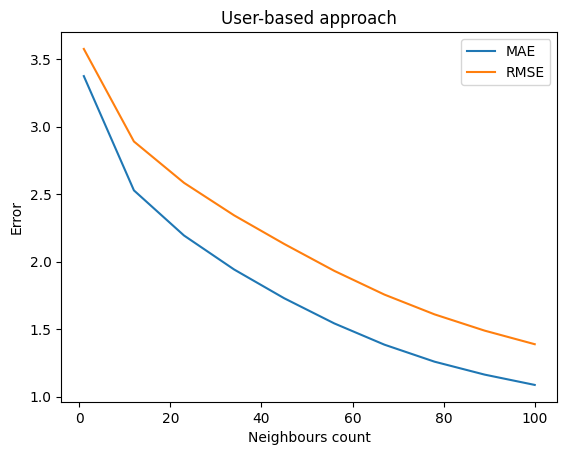

In [48]:
plt.plot(n_neighbours, mae_scores_ub, label="MAE")
plt.plot(n_neighbours, rmse_scores_ub, label="RMSE")
plt.xlabel("Neighbours count")
plt.ylabel("Error")
plt.title("User-based approach")
plt.legend()

In [49]:
mae_scores_ib = [0 for _ in n_neighbours]
rmse_scores_ib = [0 for _ in n_neighbours]
for i in tqdm(range(1,6)):
    train, test = loadMovieLens_train_test(i=i)
    for j, n in enumerate(n_neighbours):
        items = calculateSimilarItems(train, n)
        mae, rmse = 0, 0
        for person in test.keys():
            recs = getRecommendedItems(train, items, person)
            mae += error(test[person], recs)
            rmse += error(test[person], recs, type_="rmse")
        mae_scores_ib[j] += mae / len(test.keys())
        rmse_scores_ib[j] += rmse / len(test.keys())


for i in range(len(mae_scores_ib)):
    mae_scores_ib[i] /= 5
    rmse_scores_ib[i] /= 5

  0%|          | 0/5 [00:00<?, ?it/s]

100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 1633
900 / 1633
1000 / 1633
1100 / 1633
1200 / 1633
1300 / 1633
1400 / 1633
1500 / 1633
1600 / 1633
100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 1633
900 / 1633
1000 / 1633
1100 / 1633
1200 / 1633
1300 / 1633
1400 / 1633
1500 / 1633
1600 / 1633
100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 1633
900 / 1633
1000 / 1633
1100 / 1633
1200 / 1633
1300 / 1633
1400 / 1633
1500 / 1633
1600 / 1633
100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 1633
900 / 1633
1000 / 1633
1100 / 1633
1200 / 1633
1300 / 1633
1400 / 1633
1500 / 1633
1600 / 1633
100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 1633
900 / 1633
1000 / 1633
1100 / 1633
1200 / 1633
1300 / 1633
1400 / 1633
1500 / 1633
1600 / 1633
100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 16

 20%|██        | 1/5 [02:51<11:24, 171.08s/it]

100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 1630
900 / 1630
1000 / 1630
1100 / 1630
1200 / 1630
1300 / 1630
1400 / 1630
1500 / 1630
1600 / 1630
100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 1630
900 / 1630
1000 / 1630
1100 / 1630
1200 / 1630
1300 / 1630
1400 / 1630
1500 / 1630
1600 / 1630
100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 1630
900 / 1630
1000 / 1630
1100 / 1630
1200 / 1630
1300 / 1630
1400 / 1630
1500 / 1630
1600 / 1630
100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 1630
900 / 1630
1000 / 1630
1100 / 1630
1200 / 1630
1300 / 1630
1400 / 1630
1500 / 1630
1600 / 1630
100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 1630
900 / 1630
1000 / 1630
1100 / 1630
1200 / 1630
1300 / 1630
1400 / 1630
1500 / 1630
1600 / 1630
100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 16

 40%|████      | 2/5 [05:49<08:46, 175.66s/it]

100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 1634
900 / 1634
1000 / 1634
1100 / 1634
1200 / 1634
1300 / 1634
1400 / 1634
1500 / 1634
1600 / 1634
100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 1634
900 / 1634
1000 / 1634
1100 / 1634
1200 / 1634
1300 / 1634
1400 / 1634
1500 / 1634
1600 / 1634
100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 1634
900 / 1634
1000 / 1634
1100 / 1634
1200 / 1634
1300 / 1634
1400 / 1634
1500 / 1634
1600 / 1634
100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 1634
900 / 1634
1000 / 1634
1100 / 1634
1200 / 1634
1300 / 1634
1400 / 1634
1500 / 1634
1600 / 1634
100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 1634
900 / 1634
1000 / 1634
1100 / 1634
1200 / 1634
1300 / 1634
1400 / 1634
1500 / 1634
1600 / 1634
100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 16

 60%|██████    | 3/5 [08:55<06:00, 180.25s/it]

100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 1644
900 / 1644
1000 / 1644
1100 / 1644
1200 / 1644
1300 / 1644
1400 / 1644
1500 / 1644
1600 / 1644
100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 1644
900 / 1644
1000 / 1644
1100 / 1644
1200 / 1644
1300 / 1644
1400 / 1644
1500 / 1644
1600 / 1644
100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 1644
900 / 1644
1000 / 1644
1100 / 1644
1200 / 1644
1300 / 1644
1400 / 1644
1500 / 1644
1600 / 1644
100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 1644
900 / 1644
1000 / 1644
1100 / 1644
1200 / 1644
1300 / 1644
1400 / 1644
1500 / 1644
1600 / 1644
100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 1644
900 / 1644
1000 / 1644
1100 / 1644
1200 / 1644
1300 / 1644
1400 / 1644
1500 / 1644
1600 / 1644
100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 16

 80%|████████  | 4/5 [12:05<03:04, 184.13s/it]

100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 1635
900 / 1635
1000 / 1635
1100 / 1635
1200 / 1635
1300 / 1635
1400 / 1635
1500 / 1635
1600 / 1635
100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 1635
900 / 1635
1000 / 1635
1100 / 1635
1200 / 1635
1300 / 1635
1400 / 1635
1500 / 1635
1600 / 1635
100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 1635
900 / 1635
1000 / 1635
1100 / 1635
1200 / 1635
1300 / 1635
1400 / 1635
1500 / 1635
1600 / 1635
100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 1635
900 / 1635
1000 / 1635
1100 / 1635
1200 / 1635
1300 / 1635
1400 / 1635
1500 / 1635
1600 / 1635
100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 1635
900 / 1635
1000 / 1635
1100 / 1635
1200 / 1635
1300 / 1635
1400 / 1635
1500 / 1635
1600 / 1635
100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 16

100%|██████████| 5/5 [15:15<00:00, 183.18s/it]


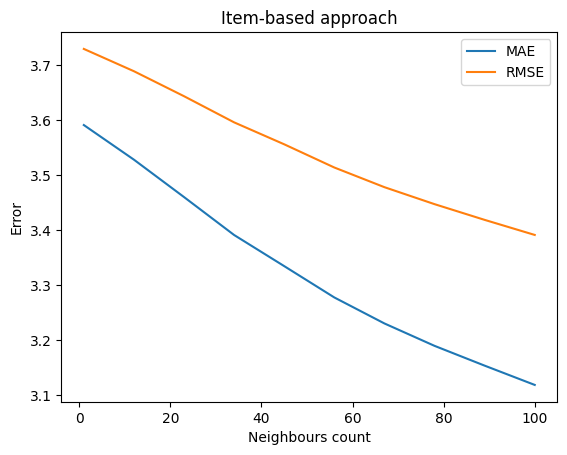

In [50]:
plt.plot(n_neighbours, mae_scores_ib, label="MAE")
plt.plot(n_neighbours, rmse_scores_ib, label="RMSE")
plt.xlabel("Neighbours count")
plt.ylabel("Error")
plt.title("Item-based approach")
plt.legend()

# 3.-5. Improvements and comparisons

In [51]:
def getNRecommendations_nf1(prefs, person, n: int, similarity=sim_pearson):
    totals = {}
    simSums = {}
    r_m = np.array(list(prefs[person].values())).mean() 
    n_closest = topMatches(prefs, person, n)
    for i, other in n_closest:
        ri_m = np.array(list(prefs[other].values())).mean()
        if other == person: continue
        sim = similarity(prefs, person, other)
        if sim <= 0: continue
        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item] == 0:
                totals.setdefault(item, 0)
                totals[item] += sim * (prefs[other][item] - ri_m)
                simSums.setdefault(item,0)
                simSums[item] += sim
    rankings=[(r_m + total/simSums[item],item) for item,total in totals.items()]
    rankings.sort(reverse=True)
    return rankings

In [52]:
def getNRecommendations_nf2(prefs, person, n: int, similarity=sim_pearson):
    totals = {}
    simSums = {}
    r_m = np.array(list(prefs[person].values())).mean() 
    sigma_u = np.array(list(prefs[person].values())).std()
    n_closest = topMatches(prefs, person, n)
    for i, other in n_closest:
        sigma_ui = np.array(list(prefs[other].values())).std()
        ri_m = np.array(list(prefs[other].values())).mean()
        if other == person: continue
        sim = similarity(prefs, person, other)
        if sim <= 0: continue
        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item] == 0:
                totals.setdefault(item, 0)
                totals[item] += sim * (prefs[other][item] - ri_m) / sigma_ui
                simSums.setdefault(item,0)
                simSums[item] += sim
    rankings=[(r_m + sigma_u * total/simSums[item],item) for item,total in totals.items()]
    rankings.sort(reverse=True)
    return rankings

In [53]:
n_neighbours = [1,3,5,10,15,20,30,40,50,100]

In [54]:
mae_scores_nf1 = [0 for _ in n_neighbours]
rmse_scores_nf1 = [0 for _ in n_neighbours]
for i in tqdm(range(1, 6)):
    train, test = loadMovieLens_train_test(i=i)
    for j, n in enumerate(n_neighbours):
        mae, rmse = 0, 0
        for person in test.keys():
            recs = getNRecommendations_nf1(train, person, n)
            mae += error(test[person], recs)
            rmse += error(test[person], recs, "rmse")
        mae_scores_nf1[j] += mae / len(test.keys())
        rmse_scores_nf1[j] += rmse / len(test.keys())   

for i in range(len(mae_scores_nf1)):
    mae_scores_nf1[i] /= 5
    rmse_scores_nf1[i] /= 5 

100%|██████████| 5/5 [09:30<00:00, 114.08s/it]


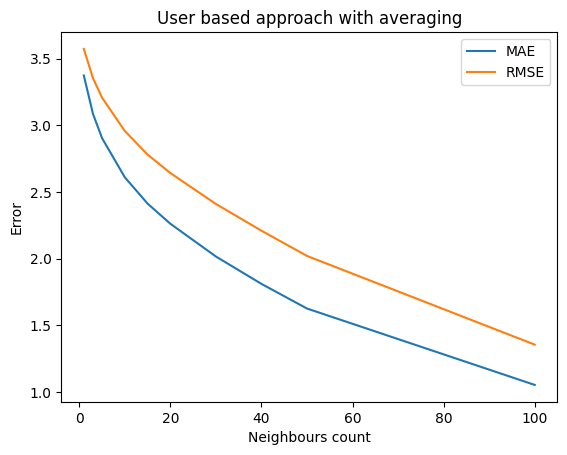

In [55]:
plt.plot(n_neighbours, mae_scores_nf1, label="MAE")
plt.plot(n_neighbours, rmse_scores_nf1, label="RMSE")
plt.xlabel("Neighbours count")
plt.ylabel("Error")
plt.title("User based approach with averaging")
plt.legend()

In [56]:
mae_scores_nf2 = [0 for _ in n_neighbours]
rmse_scores_nf2 = [0 for _ in n_neighbours]
for i in tqdm(range(1, 6)):
    train, test = loadMovieLens_train_test(i=i)
    for j, n in enumerate(n_neighbours):
        mae, rmse = 0, 0
        for person in test.keys():
            recs = getNRecommendations_nf2(train, person, n)
            mae += error(test[person], recs)
            rmse += error(test[person], recs, "rmse")
        mae_scores_nf2[j] += mae / len(test.keys())
        rmse_scores_nf2[j] += rmse / len(test.keys())   

for i in range(len(mae_scores_nf2)):
    mae_scores_nf2[i] /= 5
    rmse_scores_nf2[i] /= 5 

100%|██████████| 5/5 [10:08<00:00, 121.62s/it]


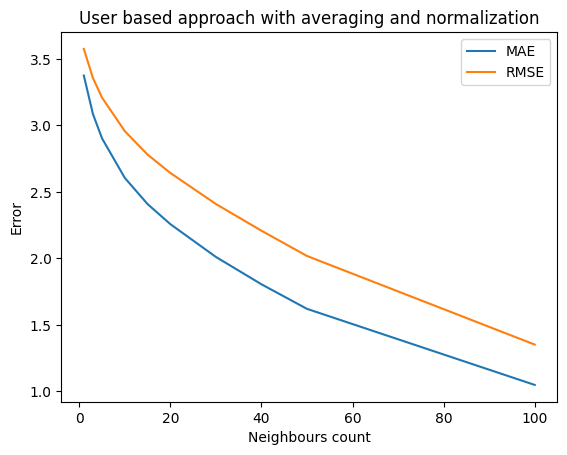

In [57]:
plt.plot(n_neighbours, mae_scores_nf2, label="MAE")
plt.plot(n_neighbours, rmse_scores_nf2, label="RMSE")
plt.xlabel("Neighbours count")
plt.ylabel("Error")
plt.title("User based approach with averaging and normalization")
plt.legend()

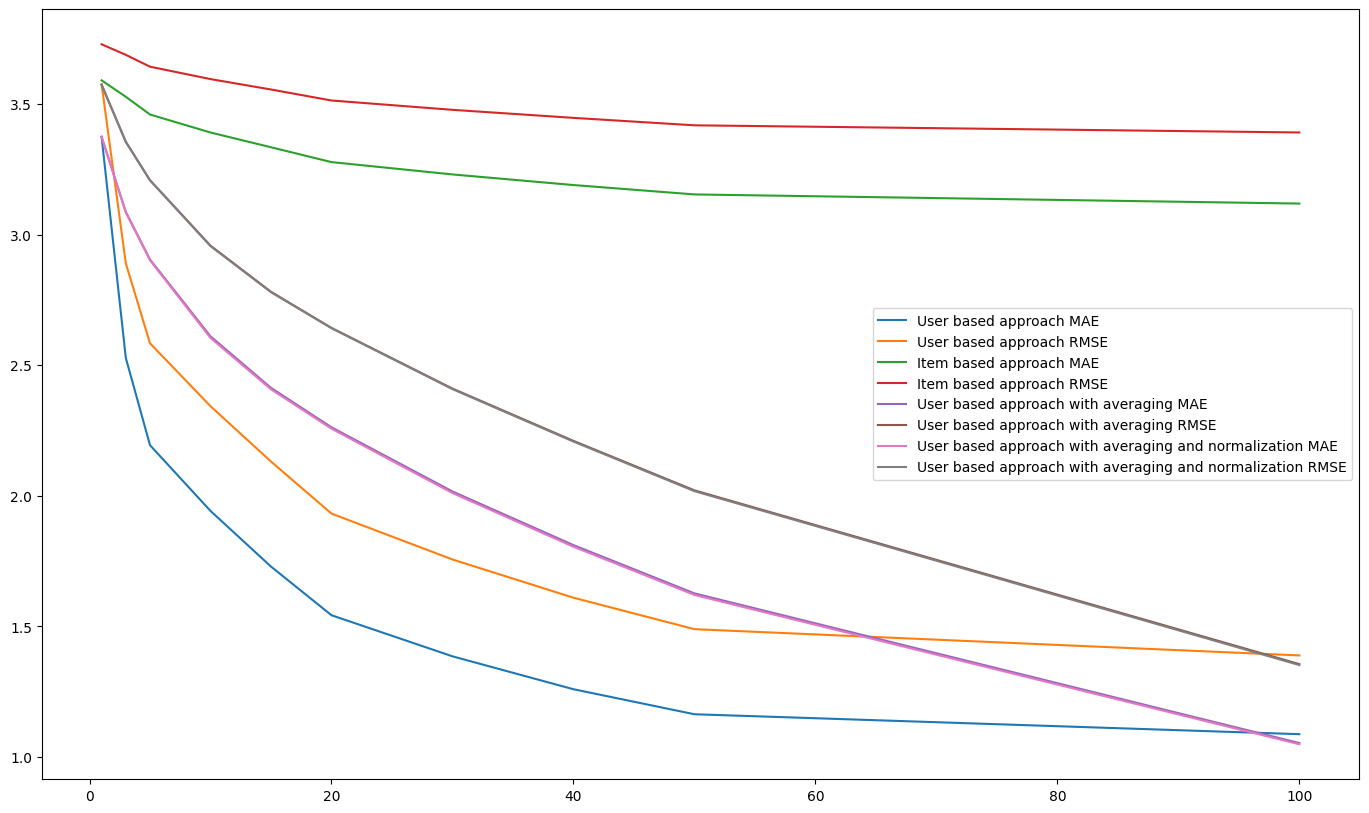

In [62]:
metrics = [
    (mae_scores_ub, rmse_scores_ub),
    (mae_scores_ib, rmse_scores_ib),
    (mae_scores_nf1, rmse_scores_nf1),
    (mae_scores_nf2, rmse_scores_nf2)
]

labels = [
    "User based approach",
    "Item based approach",
    "User based approach with averaging",
    "User based approach with averaging and normalization"
]
plt.figure(figsize=(17, 10))
for label, metric in zip(labels, metrics):
    plt.plot(n_neighbours, metric[0], label=label + " MAE")
    plt.plot(n_neighbours, metric[1], label=label + " RMSE")
plt.legend()

# 6. Which movies are recommended more often -- popular with high ratings or rare ones (i.e. with low number of ratings) with high ratings?

In [73]:
means = []
lens = []
for m, r in transformPrefs(train).items():
    means.append(np.array(list(r.values())).mean())
    lens.append(len(list(r.values())))

In [77]:
np.mean(lens), np.mean(means)

(48.79816513761468, 3.080581908903687)

In [82]:
print("Popular movies: ", len([movie for movie, r in transformPrefs(train).items() if len(r) > 60]))
print("Unpopular movies: ", len([movie for movie, r in transformPrefs(train).items() if len(r) <= 60]))

Popular movies:  434
Unpopular movies:  1201


In [86]:
print("Popular highly rated movies: ", len([movie for movie, r in transformPrefs(train).items() if len(r) > 60 and np.mean(list(r.values())) > 3.5]))
print("Unpopular highly rated movies: ", len([movie for movie, r in transformPrefs(train).items() if len(r) <= 60 and np.mean(list(r.values())) > 3.5]))

Popular highly rated movies:  263
Unpopular highly rated movies:  272


In [157]:
train, test = loadMovieLens_train_test(i=1)

In [183]:
popular_movies = [movie for movie, r in transformPrefs(train).items() if len(r) > 50 and np.mean(list(r.values())) > 3.1]
unpopular_movies = [movie for movie, r in transformPrefs(train).items() if len(r) < 50 and np.mean(list(r.values())) > 3.1]

In [184]:
len(popular_movies), len(unpopular_movies)

(436, 445)

In [205]:
pop = 0
unpop = 0
for person in tqdm(list(train.keys())):
    recs = getRecommendations(train, person)[:20]
    for r, m in recs:
        if m in popular_movies:
            pop += 1
        elif m in unpopular_movies:
            unpop += 1

100%|██████████| 943/943 [00:25<00:00, 37.62it/s]


In [206]:
round(pop/(pop+unpop), 2), round(unpop/(pop+unpop), 2)

(0.11, 0.89)

# 7. What to do if the neigbourhood (similar users or items to a target user or a certain item) is too small? How to evaluate the confidence of such recommendations? 

Answer: We can also find neighbors for the neighbors or implement hybrid version or content based approaches.

# 8.  *Auxiliary.* 
How different are top-n list for user-based and item-based methods. Try to improve the results by grid search on $\beta$ parameter for MAE (RMSE) minimisation in hybrid recommendations depending on the number of neighbours (or top-n size):
$$\beta\cdot r^{user-based}_{ui} + (1-\beta)\cdot r^{item-based}_{ui}, \text{ where } 0 \leq \beta \leq 1.$$ 

In [108]:
betas = np.linspace(0.1, 1, 10)

In [212]:
mae_scores_nf2 = [0 for _ in betas]
rmse_scores_nf2 = [0 for _ in betas]
for i in tqdm(range(1, 6)):
    train, test = loadMovieLens_train_test(i=i)
    sim = calculateSimilarItems(train, 50)
    for j, beta in enumerate(betas):
        mae, rmse = 0, 0
        for person in test.keys():
            recs = []
            recsU = getNRecommendations_nf2(train, person, 100)
            recsI = dict([(m, r) for r, m in getRecommendedItems(train, sim, person)])

            for ru, m in recsU:
                if m in recsI.keys():
                    ri = recsI[m]
                else: 
                    ri = 0
                recs.append((beta * ru + (1-beta) * ri, m))
            mae += error(test[person], recs)
            rmse += error(test[person], recs, "rmse")
        mae_scores_nf2[j] += mae / len(test.keys())
        rmse_scores_nf2[j] += rmse / len(test.keys())   

for i in range(len(mae_scores_nf2)):
    mae_scores_nf2[i] /= 5
    rmse_scores_nf2[i] /= 5 

  0%|          | 0/5 [00:00<?, ?it/s]

100 / 1633
200 / 1633
300 / 1633
400 / 1633
500 / 1633
600 / 1633
700 / 1633
800 / 1633
900 / 1633
1000 / 1633
1100 / 1633
1200 / 1633
1300 / 1633
1400 / 1633
1500 / 1633
1600 / 1633


 20%|██        | 1/5 [02:26<09:45, 146.33s/it]

100 / 1630
200 / 1630
300 / 1630
400 / 1630
500 / 1630
600 / 1630
700 / 1630
800 / 1630
900 / 1630
1000 / 1630
1100 / 1630
1200 / 1630
1300 / 1630
1400 / 1630
1500 / 1630
1600 / 1630


 40%|████      | 2/5 [05:50<09:01, 180.50s/it]

100 / 1634
200 / 1634
300 / 1634
400 / 1634
500 / 1634
600 / 1634
700 / 1634
800 / 1634
900 / 1634
1000 / 1634
1100 / 1634
1200 / 1634
1300 / 1634
1400 / 1634
1500 / 1634
1600 / 1634


 60%|██████    | 3/5 [10:24<07:25, 222.88s/it]

100 / 1644
200 / 1644
300 / 1644
400 / 1644
500 / 1644
600 / 1644
700 / 1644
800 / 1644
900 / 1644
1000 / 1644
1100 / 1644
1200 / 1644
1300 / 1644
1400 / 1644
1500 / 1644
1600 / 1644


 80%|████████  | 4/5 [15:10<04:08, 248.02s/it]

100 / 1635
200 / 1635
300 / 1635
400 / 1635
500 / 1635
600 / 1635
700 / 1635
800 / 1635
900 / 1635
1000 / 1635
1100 / 1635
1200 / 1635
1300 / 1635
1400 / 1635
1500 / 1635
1600 / 1635


100%|██████████| 5/5 [19:57<00:00, 239.55s/it]


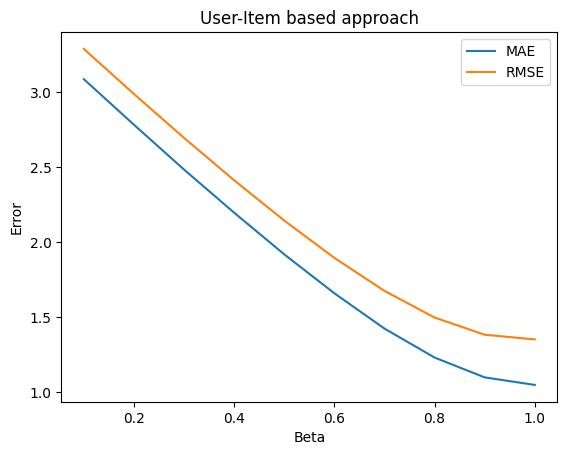

In [211]:
plt.plot(betas, mae_scores_nf2, label="MAE")
plt.plot(betas, rmse_scores_nf2, label="RMSE")
plt.xlabel("Beta")
plt.ylabel("Error")
plt.title("User-Item based approach")
plt.legend()

In [ ]:
mae_scores_nf2 = [0 for _ in betas]
rmse_scores_nf2 = [0 for _ in betas]
for i in tqdm(range(1, 6)):
    train, test = loadMovieLens_train_test(i=i)
    sim = calculateSimilarItems(train, 50)
    for j, beta in enumerate(betas):
        mae, rmse = 0, 0
        for person in test.keys():
            recs = []
            recsU = getNRecommendations_nf2(train, person, 100)
            recsI = dict([(m, r) for r, m in getRecommendedItems(train, sim, person)])

            for ru, m in recsU:
                if m in recsI.keys():
                    ri = recsI[m]
                else: 
                    ri = np.array(list(train[person].values())).mean()
                recs.append((beta * ru + (1-beta) * ri, m))
            mae += error(test[person], recs)
            rmse += error(test[person], recs, "rmse")
        mae_scores_nf2[j] += mae / len(test.keys())
        rmse_scores_nf2[j] += rmse / len(test.keys())   

for i in range(len(mae_scores_nf2)):
    mae_scores_nf2[i] /= 5
    rmse_scores_nf2[i] /= 5 

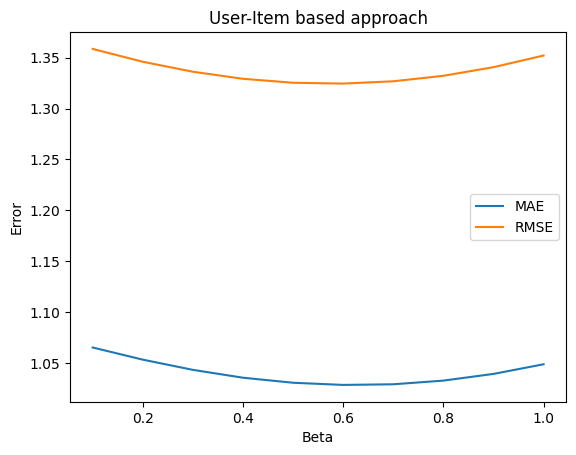

In [213]:
plt.plot(betas, mae_scores_nf2, label="MAE")
plt.plot(betas, rmse_scores_nf2, label="RMSE")
plt.xlabel("Beta")
plt.ylabel("Error")
plt.title("User-Item based approach")
plt.legend()